In [8]:
!pip install citipy

    100% |████████████████████████████████| 563kB 20.4MB/s 
  Stored in directory: /Users/hmm794/Library/Caches/pip/wheels/6f/07/0d/0392639cf1c10376f59decd06775c0e085ca2458c6036c1028
Successfully built citipy


In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy as cp


# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [46]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = cp.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # Replace spaces with %20 to create url correctly 
    city = city.replace(" ", "%20")
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:

        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

In [47]:

# OpenWeatherMap API Key
api_key = "2bca99c7a4190b8bb329f740d3deaa63"

# Starting URL for API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [48]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start counter 
record = 1

print(f"Connecting to OpenWeatherMap API")
print(f"*********************************")

# Loop through all cities in the list
for city in cities:  
    
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Add to counter
        record= record + 1
        
        # API rate limit
        time.sleep(1.01)
        
    # Skip if no match found
    except:
        print("No match found.Next.....")
    continue

Connecting to OpenWeatherMap API
*********************************
Processing Record 1 | Hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2bca99c7a4190b8bb329f740d3deaa63&q=hobart
Processing Record 2 | Kintampo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2bca99c7a4190b8bb329f740d3deaa63&q=kintampo
Processing Record 3 | Ilhabela
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2bca99c7a4190b8bb329f740d3deaa63&q=ilhabela
Processing Record 4 | Ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2bca99c7a4190b8bb329f740d3deaa63&q=ushuaia
No match found.Next.....
Processing Record 5 | Ambilobe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2bca99c7a4190b8bb329f740d3deaa63&q=ambilobe
Processing Record 6 | Butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2bca99c7a4190b8bb329f740d3deaa63&q=butaritari
No match found.Next.....
Processing Record 7 | Yular

In [102]:
weather_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create df 
weathrdf = pd.DataFrame(weather_dict)
w2 = weathrdf.set_index("City")

# Display count
w2.head()
#row number 262 is ourageously high humidity , so i am deleting it
w2.drop(index= 'Paita')
w2.head()

,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City,,,,,,,,
Hobart,20,AU,07/03/2019,86,-42.88,147.33,41.00,4.70
Kintampo,58,GH,07/03/2019,93,8.05,-1.73,73.52,7.63
Ilhabela,100,BR,07/03/2019,82,-23.78,-45.36,75.68,9.10
Ushuaia,0,AR,07/03/2019,92,-54.81,-68.31,24.80,10.29
Ambilobe,22,MG,07/03/2019,79,-13.19,49.05,69.20,5.84


In [103]:
w2.to_csv('weather_data.csv', index=False)

In [104]:
# add today's date
date = time.strftime("%m/%d/%Y")
print(date)

07/03/2019


Latitude vs Temperature

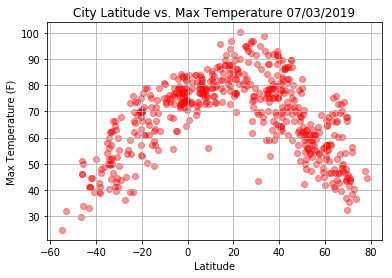

In [105]:
# Build a scatter plot for each data type
plt.scatter(w2["Lat"], w2["Max Temp"], marker="o", facecolor = "red", alpha = 0.4)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature {date}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

Latitude vs Humidity

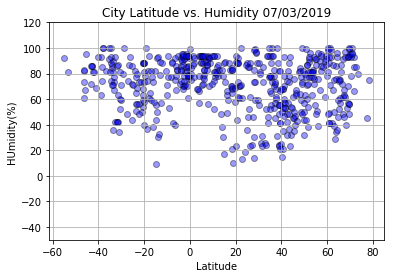

In [111]:
# Build a scatter plot for each data type
plt.scatter(w2["Lat"], w2["Humidity"], marker="o", facecolor = "blue", alpha = 0.4, edgecolor = "black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity {date}")
plt.ylabel("HUmidity(%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.ylim(-50, 120)

# Save the figure
plt.savefig("HUmidityInWorldCities.png")

# Show plot
plt.show()

Latitude vs. Cloudiness Plot

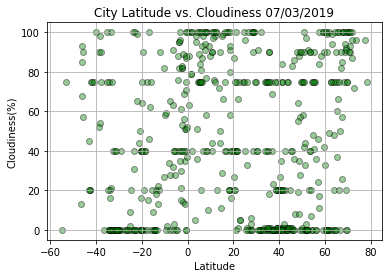

In [112]:
# Build a scatter plot for each data type
plt.scatter(w2["Lat"], w2["Cloudiness"], marker="o", facecolor = "green", alpha = 0.4, edgecolor = "black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness {date}")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)
# plt.ylim(-50, 120)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

Latitude vs. Wind Speed Plot

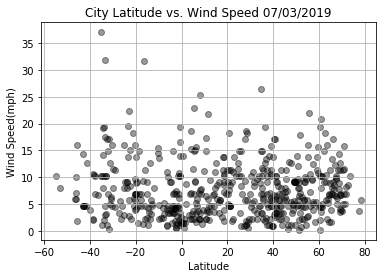

In [113]:
# Build a scatter plot for each data type
plt.scatter(w2["Lat"], w2["Wind Speed"], marker="o", facecolor = "black", alpha = 0.4, edgecolor = "black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed {date}")
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)
# plt.ylim(-50, 120)

# Save the figure
plt.savefig("WindSpeedInWorldCities.png")

# Show plot
plt.show()


Three observable Trends based on the data

Based on the data, the initial code provided to generate location was able to randomly select cities accross a wide range of latitude and longitudes. the cities were not just concentrated in one latitudinal region.

Temperature is dependent on the latitude of the city/location, the closer to the equator you are, the higher your temoerature.

There doesnt seem to be any relationship between latitude , wind speed and wind speed as the speed is about average for the various latitudes generated.

It seems cities closest to the equator have a smaller range in humidity, however cities farther away from the equator have a wider range in humidity. This may be based on their longitude, but in the absence of graphing that data, I cannot make concrete conclusions.